In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(4)

Manual PCA

In [2]:
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print(X.shape)

(60, 3)


In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
print("U.shape = {}, s.shape = {}, Vt.shape = {}".format(U.shape, s.shape, Vt.shape))
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

m, n = X.shape
S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

U.shape = (60, 60), s.shape = (3,), Vt.shape = (3, 3)


In [4]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [5]:
W2 = Vt.T[:, :2]
X2D_manual = X_centered.dot(W2)

In [6]:
X2D_manual[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

PCA with sklearn

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [8]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

Compression

In [9]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

154


In [11]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))

154
0.9503684424557437


In [12]:
pca = PCA(n_components = 153)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [13]:
def plot_digit(digit):
    plt.imshow(digit.reshape(28, 28), cmap='binary')

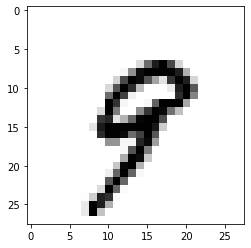

In [14]:
plot_digit(X_train[0])

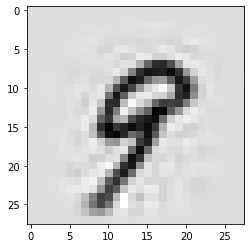

In [15]:
plot_digit(X_recovered[0])